In [3]:
import pandas as pd
import numpy as np
import itertools
from tqdm import tqdm
import pickle

# Import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder, LabelEncoder)
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import classification_report
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from xgboost import XGBClassifier

In [4]:
train = pd.read_csv('../data/mushrooms.csv')
print(train.shape)
train.head()
print(train.dtypes)

(8124, 23)
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [5]:
X = train.drop(columns=['class'])
y = train['class']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("#" * 30)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5686, 22)
y_train shape: (5686,)
##############################
X_test shape: (2438, 22)
y_test shape: (2438,)


In [6]:
num_vars = []
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler())]
)

cat_vars = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
            'spore-print-color', 'population', 'habitat']
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='most_frequent')),
           ("ohe", OneHotEncoder(handle_unknown="ignore", drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'bruises', 'odor', 'gill-attachment',
                                  'gill-spacing', 'gill-size', 'gill-color',
                                  'stalk-shape', 'stalk-root',
                                  'stalk-surface-above-ring',
                                  'stalk-surface-below-ring',
                                  'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type',
                                  'veil-color', 'ring-number', 'ring-type',
                                  'spore-print-color', 'population',
                                  'habitat'])])

In [7]:


clf = XGBClassifier(n_estimators=650,
                    max_depth=12,
                    learning_rate=0.01,
                    subsample=1,
                    random_state=0,
                    )
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=650, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [8]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', clf)])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-at...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=650,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

In [9]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-at...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=12, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=650, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

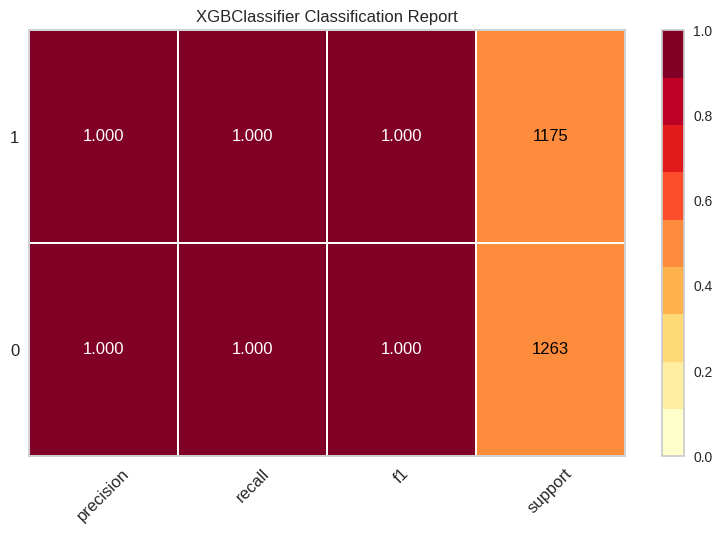

In [10]:
_ = classification_report(
    pipe,
    X_train,
    y_train,
    X_test,
    y_test,
    support=True)

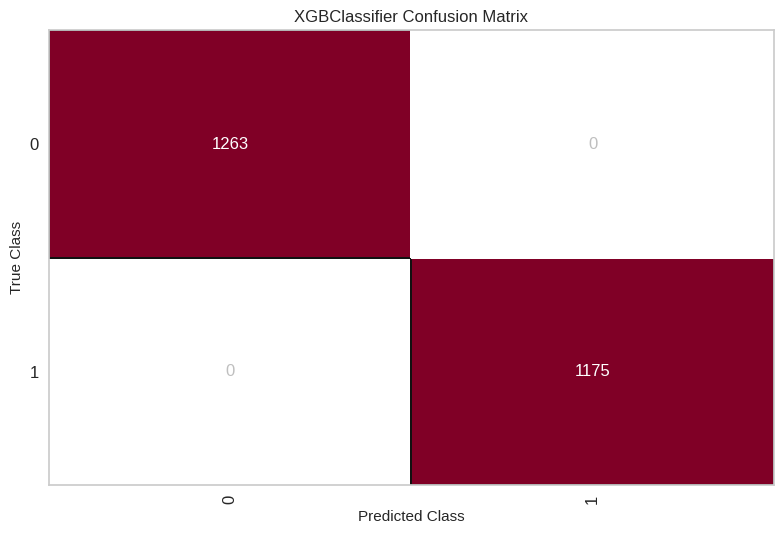

In [11]:
_ = confusion_matrix(
    pipe,
    X_train,
    y_train,
    X_test,
    y_test
)

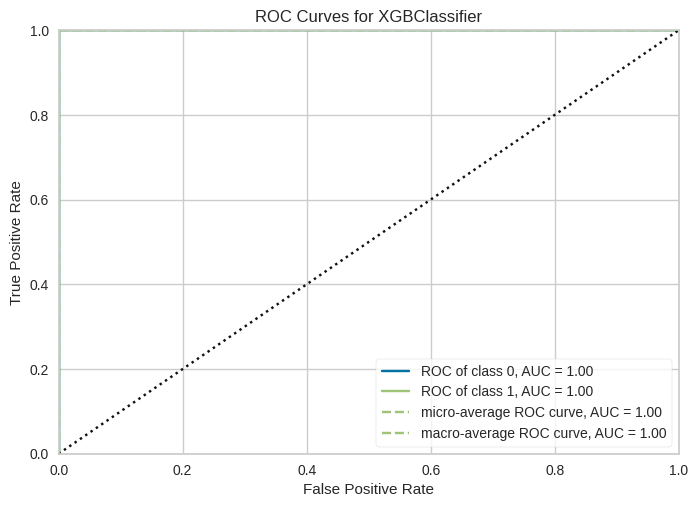

In [12]:
_ = roc_auc(pipe,
            X_train,
            y_train,
            X_test,
            y_test)

In [15]:
with open(r"../model/model.pickle", "wb") as model:
    pickle.dump(pipe, model)

In [ ]:
X